<a href="https://colab.research.google.com/github/jadinsstewart/Congressional-Analytics/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ella Archie and Jadin Stewart

GSB S521-01

January 23rd, 2023

<h1><center>Political Affiliation by Number of Computers Owned per Household </center></h1>

# Introduction



In class last week, we looked at the relationship between household income and political affiliation. While we observed a correlation between the two variables, we discussed the possibility of there being confounding variables, specifically highest level of education achieved.

While we originally had planned to investigate the relationship between political affiliation and education, we found another variable that we thought might lead to interesting findings. In this presentation, we will investigate the relationship between political affiliation and the percentage of households that have at least a desktop or a laptop in their home.

# Hypothesis

We hypothesis that districts with a high percentage of households having 1+ computers will tend to be democratic while districts with a low percentage of households having 1+ computers will tend to be republican.

Our hypothesis is based on the premise that the presence of a desktop or laptop in the home likely positively correlates to both education levels and household incomes, which in turn, relate to political affiliation. The digital divide most negatively impacts lower income households (which, as we discovered last week, tend to be more red), as well as rural areas (which are also generally more politically conservative). 

# ACS Data

In [ ]:
# Libraries
import pandas as pd  
import json 
from urllib.request import urlopen 
import matplotlib.pyplot as plt 

In [ ]:
# URL for ACS Computer Data
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B28001_011E,B28001_003E&for=congressional%20district:*&in=state:*"

# Storing the Response of the URL
response = urlopen(url)

# Storing JSON Response from URL in Data
data_json = json.loads(response.read()) 

# Removing the First Row (Headers)
data_json.pop(0)

# Manually Populating Columns
cols = ['District Name','Total Households','No Computer', '1+ Computers', 'State code', 'district number']

acs_df = pd.DataFrame(data_json, columns = cols)

# Cleaning the Data
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True) 
acs_df['district number'] = pd.to_numeric(acs_df['district number'])
acs_df['State'] = acs_df['State'].str.strip()

# Keeping Only Our Selected Columns
acs_df = acs_df[['Total Households', 'No Computer', "1+ Computers", 'district number', 'State']]

# Looking at the Top Results
acs_df.head()

,Total Households,No Computer,1+ Computers,district number,State
0,289474,15425,229568,10,Michigan
1,299804,18341,211861,4,Mississippi
2,278057,14747,212966,14,Michigan
3,306685,21251,234002,1,Michigan
4,285554,23272,196641,3,Mississippi


In [ ]:
# Convert Columns to Numeric Data Types
acs_df["Total Households"] = pd.to_numeric(acs_df["Total Households"])
acs_df["No Computer"] = pd.to_numeric(acs_df["No Computer"])
acs_df['1+ Computers'] = pd.to_numeric(acs_df['1+ Computers'])

# Computing New Columns for Percentage of Households
acs_df['% of households with no computer'] = (100*acs_df['No Computer'])/acs_df['Total Households']
acs_df['% of households with 1+ computers'] = (100*acs_df['1+ Computers'])/acs_df['Total Households']

# Looking at the Top Results
acs_df.head()

,Total Households,No Computer,1+ Computers,district number,State,% of households with no computer,% of households with 1+ computers
0,289474,15425,229568,10,Michigan,5.328631,79.305223
1,299804,18341,211861,4,Mississippi,6.117664,70.666502
2,278057,14747,212966,14,Michigan,5.303589,76.590771
3,306685,21251,234002,1,Michigan,6.929260,76.300439
4,285554,23272,196641,3,Mississippi,8.149772,68.862982


# Political Affiliation Data

In [ ]:
# Reading Congressional Data into Pandas Dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# Extracting District Number
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Keeping Our Selected Columns
party_df = party_df[['State', 'Party', "district number"]]

# Looking at the Top Results
party_df.head(5)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


In [ ]:
# Checking the Join Worked
party_df['State'].value_counts()

California                  53
Texas                       36
New York                    27
Florida                     27
Pennsylvania                18
Illinois                    18
Ohio                        16
Michigan                    14
Georgia                     14
North Carolina              13
New Jersey                  12
Virginia                    11
Washington                  10
Indiana                      9
Arizona                      9
Tennessee                    9
Massachusetts                9
Minnesota                    8
Missouri                     8
Maryland                     8
Wisconsin                    8
Colorado                     7
Alabama                      7
South Carolina               7
Louisiana                    6
Kentucky                     6
Oklahoma                     5
Oregon                       5
Connecticut                  5
Nevada                       4
Kansas                       4
Arkansas                     4
Iowa    

In [ ]:
# Checking the Join Worked
acs_df['State'].value_counts()

California              53
Texas                   36
Florida                 27
New York                27
Illinois                18
Pennsylvania            18
Ohio                    16
Georgia                 14
Michigan                14
North Carolina          13
New Jersey              12
Virginia                11
Washington              10
Indiana                  9
Massachusetts            9
Arizona                  9
Tennessee                9
Missouri                 8
Wisconsin                8
Minnesota                8
Maryland                 8
South Carolina           7
Alabama                  7
Colorado                 7
Kentucky                 6
Louisiana                6
Connecticut              5
Oklahoma                 5
Oregon                   5
Iowa                     4
Kansas                   4
Arkansas                 4
Mississippi              4
Nevada                   4
Utah                     4
New Mexico               3
West Virginia            3
N

# Merging the Data

In [ ]:
# Merging our Data
merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])

In [ ]:
# Summary of our New Merged Data
merged_df.describe()

,Total Households,No Computer,1+ Computers,district number,% of households with no computer,% of households with 1+ computers
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,292471.643678,14503.786207,235438.358621,10.158621,5.006509,80.304523
std,33670.787672,5817.363063,37118.515775,10.656779,2.084671,6.674607
min,183319.000000,3320.000000,125227.000000,0.000000,1.138374,61.784249
25%,273747.000000,9984.500000,211701.500000,3.000000,3.448547,76.201699
50%,292311.000000,14180.000000,235902.000000,6.000000,4.738514,80.452196
75%,311849.500000,18238.000000,256530.000000,13.000000,6.256504,85.494150
max,448949.000000,32899.000000,363544.000000,53.000000,12.741596,93.218512


In [ ]:
# Checking Party Breakdown
merged_df['Party'].value_counts()

D    233
R    201
L      1
Name: Party, dtype: int64

# Visualization

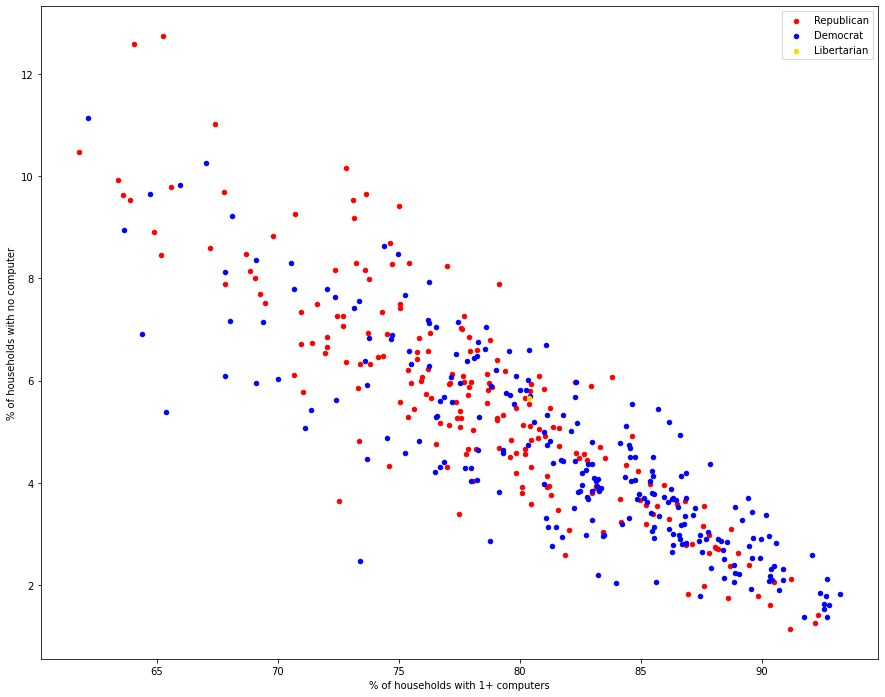

In [ ]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]
L = merged_df[merged_df['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households with 1+ computers', y='% of households with no computer', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households with 1+ computers', y='% of households with no computer',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households with 1+ computers', y='% of households with no computer',c='gold',label='Libertarian', ax=ax)

plt.legend()
plt.show()

# Findings


At a first glance, the scatterplot above does not appear to show a particularly strong correlation between computers owned and political affiliation. However, we can see that the bottom right region of the graph, districts with a high percentage of households with 1+ computers and a low percentage of households with no computer, is mostly populated with blue dots. This correlation supports our hypothesis that districts with a high percentage of households having 1+ computers tend to be democratic.

Further analysis could be conducted to potentially find a stronger correlation between politcal affiliation and the presence of technology in the household. For instance, perhaps increasing the number of computers in the household from simply 1 or more would show a greater contrast (zero versus 3+ for instance). Taking into account other devices such as smartphones or tablets could also yield some interesting results. Adding in an additional factor such as access to the internet would likely provide more insight to the relationship as well. 